In [2]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(df_market_data)

In [7]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(market_data_scaled, columns=["price_change_percentage_24h", "price_change_percentage_7d", 
                                                                  "price_change_percentage_14d", "price_change_percentage_30d", 
                                                                  "price_change_percentage_60d", "price_change_percentage_200d",	
                                                                  "price_change_percentage_1y"] )

# Copy the crypto names from the original DataFrame
df_market_data_scaled["coin_id"] = df_market_data.index

# Set the coin_id column as index
df_market_data_scaled = df_market_data_scaled.set_index('coin_id')

# Display the scaled DataFrame
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [9]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(df_market_data_scaled)
    inertia.append(model.inertia_)

c:\Users\cindy\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\cindy\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\cindy\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\cindy\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\cindy\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

In [10]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k":k,"inertia":inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

In [11]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_plot = elbow_df.hvplot.line(x="k", y= "inertia", title="Elbow curve using Market Data")
elbow_plot

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best K value (amount of clusters) would be between 4 and 6. Using analyst judgement, 4 would make sense as the inertia value plateaus at 5 and 6.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [12]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [13]:
# Fit the K-Means model using the scaled DataFrame
model.fit(df_market_data_scaled)

c:\Users\cindy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(clusters)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 3
 0 0 0 0]


In [15]:
# Create a copy of the scaled DataFrame
market_data_predictions = df_market_data_scaled.copy()

In [16]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters

market_data_predictions["clusters"] = clusters
# Display the copy of the scaled DataFrame
market_data_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [17]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
market_data_predictions.hvplot.scatter(
x="price_change_percentage_24h",
y="price_change_percentage_7d",
by='clusters',
hover_cols="coin_id",
title="Scatter Plot of the scaled Market Data"
)

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [19]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
market_data_pca = pca.fit_transform(df_market_data_scaled)

# View the scaled PCA data
market_data_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [20]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [22]:
total_explained_variance_ratio = 0.3719856 + 0.34700813 + 0.17603793
print(total_explained_variance_ratio)

0.89503166


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** the total explained variance ratio of the three principal compenents is approximately 0.895. 

In [23]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(market_data_pca,columns=["PC1","PC2","PC3"])

# Copy the crypto names from the original scaled DataFrame

pca_df['coin_id'] = df_market_data_scaled.index

# Set the coin_id column as index

pca_df = pca_df.set_index("coin_id")
# Display the scaled PCA DataFrame
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [24]:
# Create a list with the number of k-values from 1 to 11
k_2 = list(range(1, 11))

In [25]:
# Create an empty list to store the inertia values
inertia_2 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k_2:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(pca_df)
    inertia_2.append(model.inertia_)

c:\Users\cindy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cindy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cindy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cindy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [26]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_2 = {"k":k_2,"inertia":inertia_2}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df_2 = pd.DataFrame(elbow_data_2)

In [27]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_plot_2 = elbow_df_2.hvplot.line(x="k", y= "inertia", title="Elbow curve using Market Data (PCA)")
elbow_plot_2

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best K value (amount of clusters) would be between 4 and 6. Using analyst judgement, 4 would make sense as the inertia value plateaus at 5 and 6.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** There is no obvious difference between the best k value using the original data. The elbow curve seems to fall between 4 and 6. 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [28]:
# Initialize the K-Means model using the best value for k
model_2 = KMeans(n_clusters=4)

In [29]:
# Fit the K-Means model using the PCA data
model_2.fit(pca_df)

c:\Users\cindy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [30]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
cluster_2 = model_2.predict(pca_df)

# Print the resulting array of cluster values.
print(cluster_2)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


In [31]:
# Create a copy of the scaled PCA DataFrame
pca_df_predictions = pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_df_predictions["clusters_2"] = cluster_2

# Display the copy of the scaled PCA DataFrame
pca_df_predictions.head()

,PC1,PC2,PC3,clusters_2
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3


In [33]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
pca_df_predictions.hvplot.scatter(
x="PC1",
y="PC2",
by="clusters_2",
hover_cols="coin_id",
title='Scatter Plot of the scaled Market Data(PCA)'
)

:NdOverlay   [clusters_2]
   :Scatter   [PC1]   (PC2,coin_id)

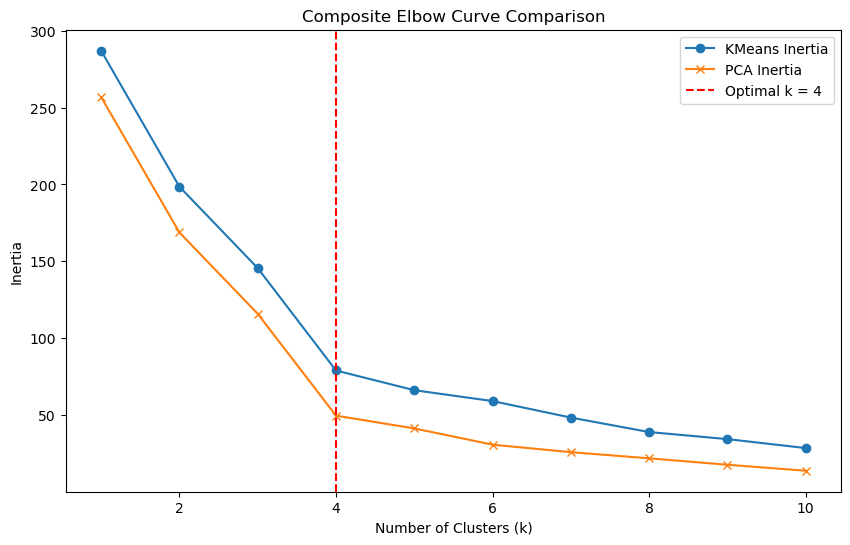

In [36]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!
plt.figure(figsize=(10, 6))
plt.plot(k, inertia, label='KMeans Inertia', marker='o')
plt.plot(k_2, inertia_2, label='PCA Inertia', marker='x')
plt.title('Composite Elbow Curve Comparison')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.axvline(x=4, color='r', linestyle='--', label='Optimal k = 4')
plt.legend()
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

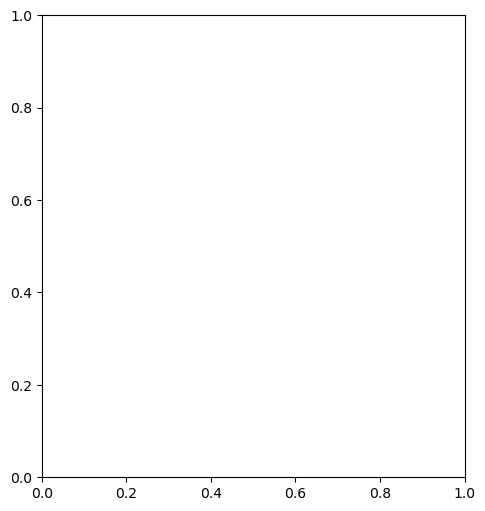

In [38]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
plt.figure(figsize=(12, 6))

# KMeans Clusters
plt.subplot(1, 2, 1)
plt.scatter(market_data_predictions[:, 0], market_data_predictions[:, 1], c=market_data_predictions[:,6], cmap='viridis', marker='o', edgecolor='k')
plt.title('KMeans Clustering')
plt.xlabel('price_change_percentage_24h')
plt.ylabel('price_change_percentage_7d')

# PCA Clustering
plt.subplot(1, 2, 2)
plt.scatter(pca_df_predictions[:, 0], pca_df_predictions[:, 1], c=pca_df_predictions[:,3], cmap='viridis', marker='o', edgecolor='k')
plt.title('PCA Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 